## Loading Library

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [160]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [161]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

datasetnya tidak memiliki missing value

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-163-2220adb35cfb>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour
<ipython-input-163-2220adb35cfb>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  daily_transaction_trend = df.groupby(pd.to_datetime(df['date_time']).dt.date)['Transaction'].size()


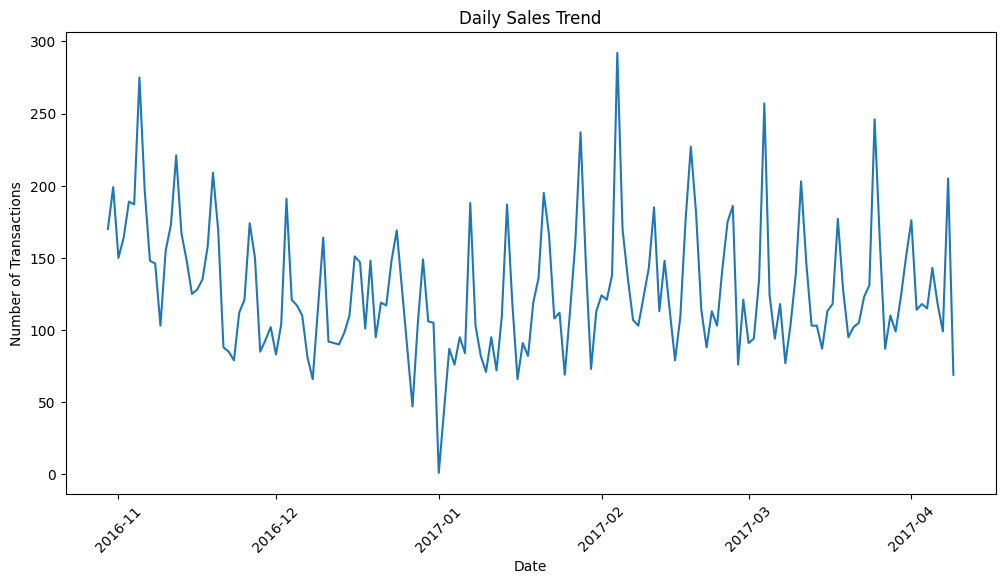

In [163]:
# 5
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
daily_transaction_trend = df.groupby(pd.to_datetime(df['date_time']).dt.date)['Transaction'].size()
daily_transaction_trend.plot(kind='line', figsize=(12, 6), title="Daily Sales Trend")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [164]:
# 6
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-164-99e20e35d5db>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day'] = pd.to_datetime(df['date_time']).dt.day
<ipython-input-164-99e20e35d5db>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['date_time']).dt.month
<ipython-input-164-99e20e35d5db>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was spe

,Transaction,Item,date_time,period_day,weekday_weekend,hour,day,month,year,time,day_name
9113,4599,Cake,13-01-2017 10:41,morning,weekday,10,13,1,2017,10:41:00,Friday
7164,3618,Cake,21-12-2016 14:24,afternoon,weekday,14,21,12,2016,14:24:00,Wednesday
18500,8779,Bread,25-03-2017 12:49,afternoon,weekend,12,25,3,2017,12:49:00,Saturday
3920,1905,Cookies,23-11-2016 11:50,morning,weekday,11,23,11,2016,11:50:00,Wednesday
9115,4600,Bread,13-01-2017 10:43,morning,weekday,10,13,1,2017,10:43:00,Friday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


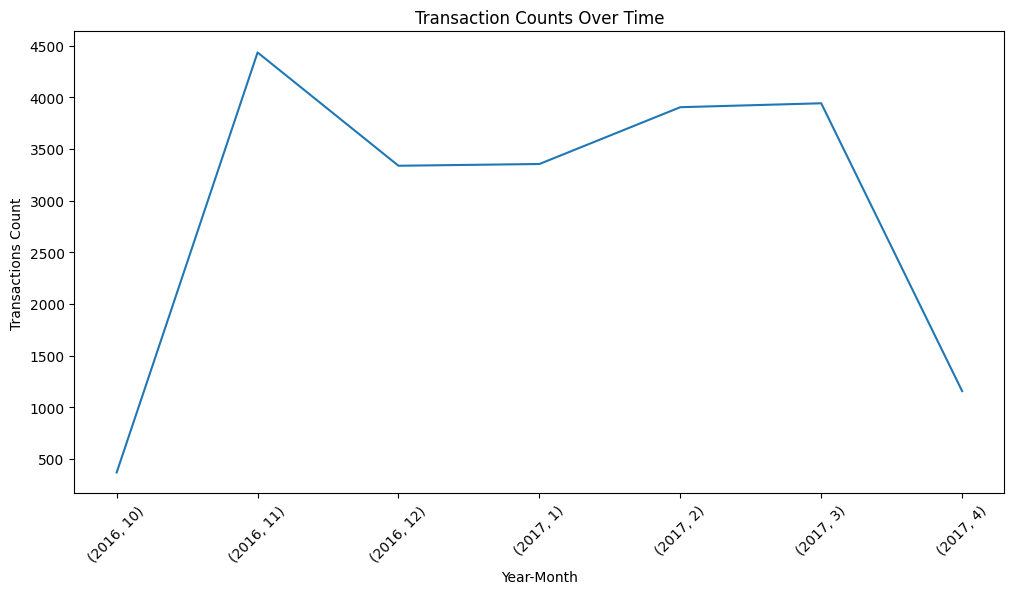

In [165]:
# 7
monthly_sales = df.groupby(['year','month'])['Transaction'].size()
monthly_sales.plot(kind='line', figsize=(12, 6), title="Transaction Counts Over Time")
plt.xlabel('Year-Month')
plt.ylabel('Transactions Count')
plt.xticks(rotation=45)
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Penjualan paling banyak terjadi di bulan 11 tahun 2016, diikuti dengan bulan 3 2017

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [166]:
#9
weekday = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print(f"Unique weekday names: {weekday}")
print(f"Unique weekend names: {weekend}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [167]:
#10
aggregated_data = df.groupby(['month', 'day_name'])['Transaction'].size()

# Pivot the data to create the desired table format
pivot_table = aggregated_data.unstack()

# Fill any missing values with 0
pivot_table = pivot_table.fillna(0).astype(int)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=day_order)
pivot_table = pivot_table.astype(int)
# Display the result
pivot_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

Penjualan tiap harinya di bulan Januari, Februari, Maret, April, Oktober, November, dan Desember


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


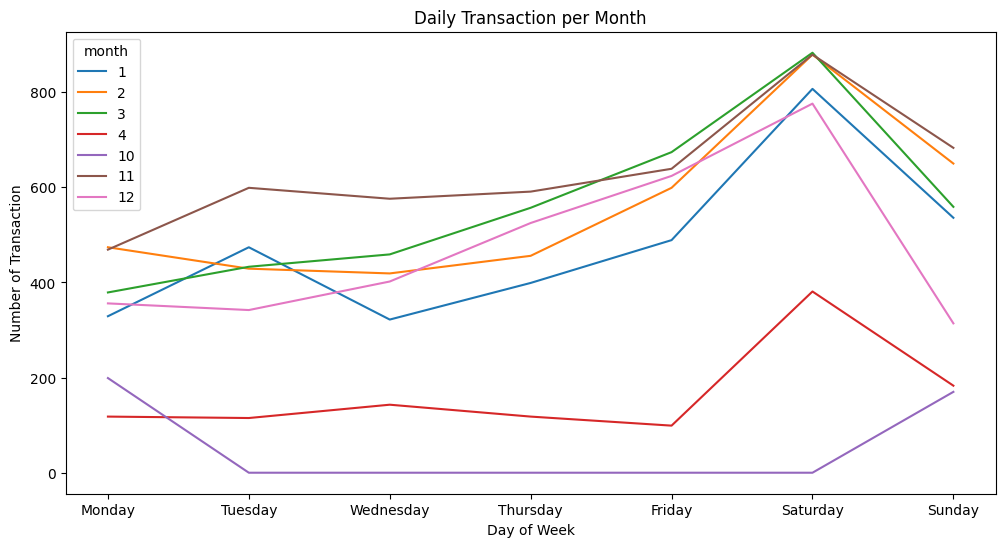

In [168]:
# 12
pivot_table.T.plot(kind='line', figsize=(12, 6), title="Daily Transaction per Month")
plt.xlabel('Day of Week')
plt.ylabel('Number of Transaction')
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Pada hari sabtu, memiliki penjualan paling banyak di semua bulan, dan bulan 11 serta bulan 2 memiliki transaksi 2 paling banyak

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [169]:
# 14
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [170]:
# 15
mourning_hour = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hour = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hour = df[df['period_day'] == 'evening']['hour'].unique()
night_hour = df[df['period_day'] == 'night']['hour'].unique()

print(f"Unique mourning_hour: {mourning_hour}")
print(f"Unique afternoon_hour: {afternoon_hour}")
print(f"Unique evening_hour: {evening_hour}")
print(f"Unique night_hour: {night_hour}")

Unique mourning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

yang aneh adalah tidak ada jam 12 malam, tetapi ada jam 1 pagi


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


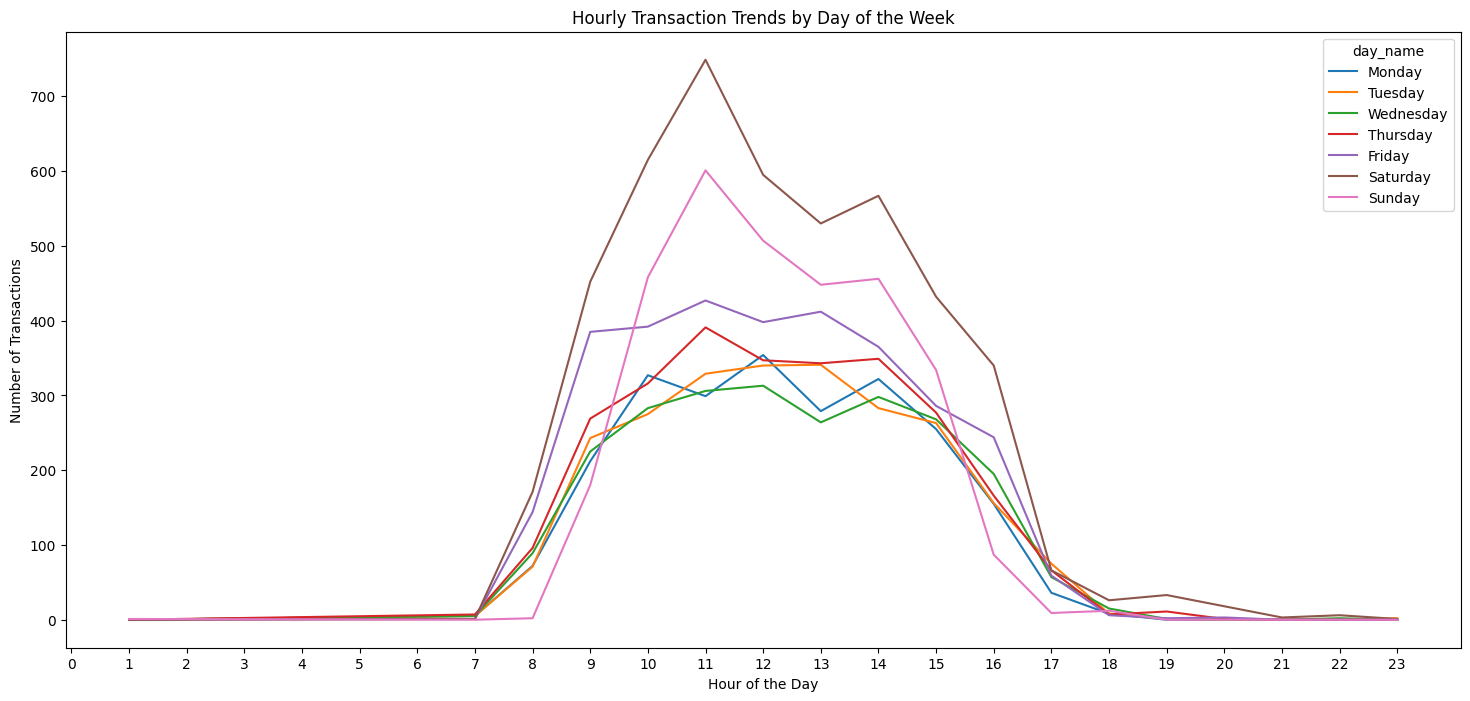

In [171]:
# 17
hour_transaction = df.groupby(['hour','day_name'])['Transaction'].size()
hour_table = hour_transaction.unstack()
hour_table = hour_table.fillna(0).astype(int)
hour_table = hour_table.reindex(columns=day_order)
hour_table.plot(kind='line', figsize=(18, 8), title="Hourly Transaction Trends by Day of the Week")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.show()

18. The daily sales trend plot reveals that _______

Jam 11 siang memiliki penjualan paling banyak.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


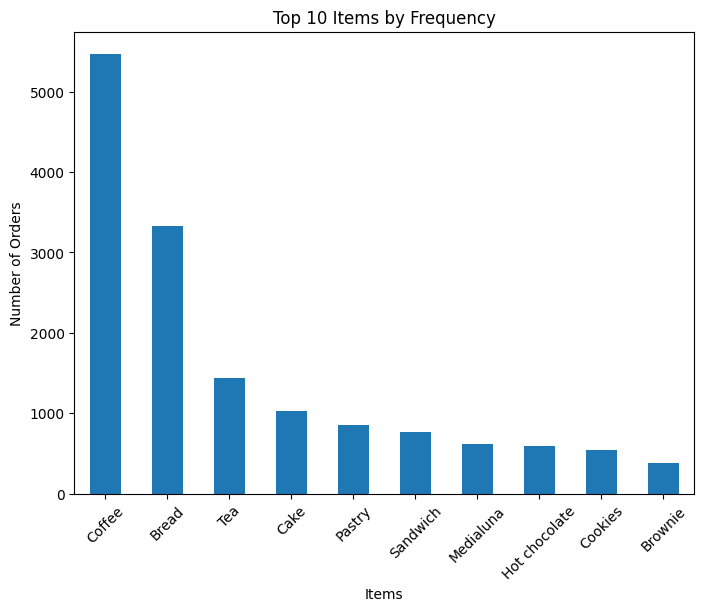

In [172]:
# 19
plt.figure(figsize=(8, 6))
item_counts = df['Item'].value_counts()
top_10_items = item_counts.head(10)
top_10_items.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.title('Top 10 Items by Frequency')
plt.xticks(rotation=45)
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-173-fd6543cbfb10>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  morning_colors = plt.cm.get_cmap('plasma', len(morning_item))
<ipython-input-173-fd6543cbfb10>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  afternoon_colors = plt.cm.get_cmap('plasma', len(afternoon_item))
<ipyt

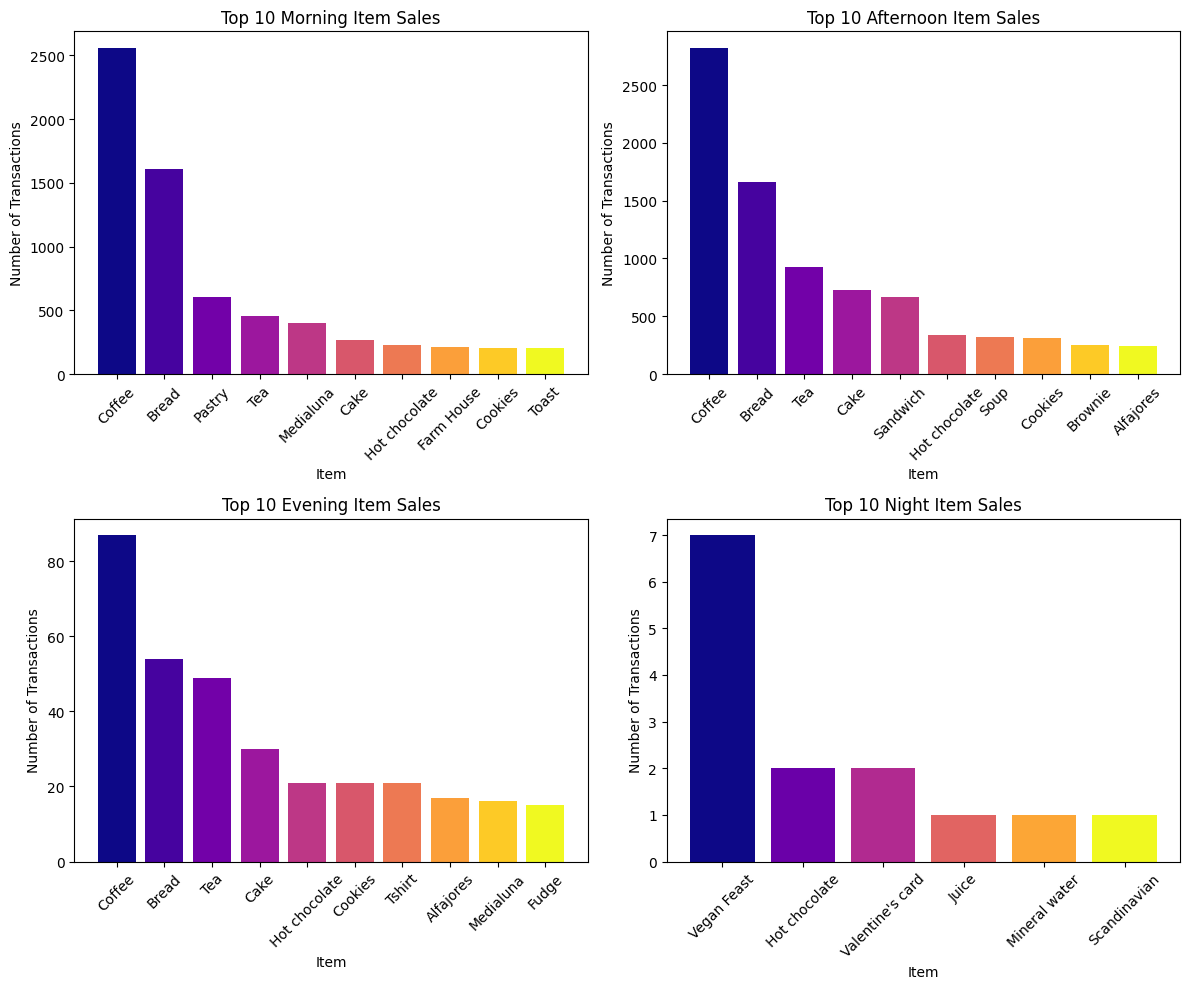

In [173]:
# 20
import matplotlib.pyplot as plt
import numpy as np

# Calculate item counts for each period of the day and get the top 10 items
morning_item = df[df['period_day'] == 'morning']['Item'].value_counts().head(10)
afternoon_item = df[df['period_day'] == 'afternoon']['Item'].value_counts().head(10)
evening_item = df[df['period_day'] == 'evening']['Item'].value_counts().head(10)
night_item = df[df['period_day'] == 'night']['Item'].value_counts().head(10)

# Generate a list of distinct colors for the bars
morning_colors = plt.cm.get_cmap('plasma', len(morning_item))
afternoon_colors = plt.cm.get_cmap('plasma', len(afternoon_item))
evening_colors = plt.cm.get_cmap('plasma', len(evening_item))
night_colors = plt.cm.get_cmap('plasma', len(night_item))

# Create 4 subplots to visualize the top 10 items in each period
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Morning plot with different colors for each bar
axes[0, 0].bar(morning_item.index, morning_item.values, color=morning_colors(np.arange(len(morning_item))))
axes[0, 0].set_title('Top 10 Morning Item Sales')
axes[0, 0].set_xlabel('Item')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)

# Afternoon plot with different colors for each bar
axes[0, 1].bar(afternoon_item.index, afternoon_item.values, color=afternoon_colors(np.arange(len(afternoon_item))))
axes[0, 1].set_title('Top 10 Afternoon Item Sales')
axes[0, 1].set_xlabel('Item')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].tick_params(axis='x', rotation=45)

# Evening plot with different colors for each bar
axes[1, 0].bar(evening_item.index, evening_item.values, color=evening_colors(np.arange(len(evening_item))))
axes[1, 0].set_title('Top 10 Evening Item Sales')
axes[1, 0].set_xlabel('Item')
axes[1, 0].set_ylabel('Number of Transactions')
axes[1, 0].tick_params(axis='x', rotation=45)

# Night plot with different colors for each bar
axes[1, 1].bar(night_item.index, night_item.values, color=night_colors(np.arange(len(night_item))))
axes[1, 1].set_title('Top 10 Night Item Sales')
axes[1, 1].set_xlabel('Item')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



21. It turns out that there is something different in the plot above, the insight is ____


Pada malam hari, penjualan paling banyaknya adalah vegan feast, sedangkan di ketiga waktu lainnya merupakan coffee

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-174-b26606a462e8>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
<ipython-input-174-b26606a462e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_dat

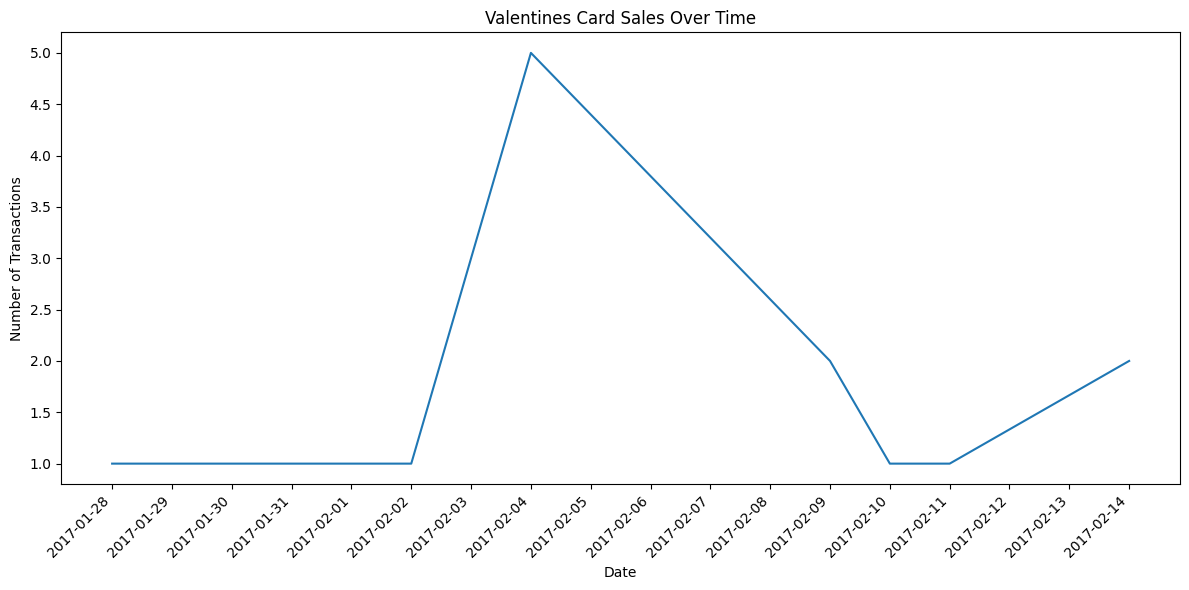

In [174]:
#22
valentine_sales = df[df['Item'] == "Valentine's card"]
valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


penjualan valentine card terjadi pada bulan februari saja dan penjualan paling banyaknya adalah 5

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [175]:
# 24
apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
#25
encoded_df = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
encoded_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-176-e4fcc6d22040>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [177]:
# 26
frequent_itemsets = apriori(encoded_df, min_support=0.02, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [181]:
# 27
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Berdasarkan hasil analisis data dari The Bread Basket dataset, ditemukan beberapa asosiasi produk yang sering dibeli bersamaan, seperti Pastry dan Bread, serta Coffee dan Cake. Pastry dan Bread menunjukkan hubungan yang moderat dengan lift 1.03, sementara Coffee dan Cake memiliki asosiasi yang lebih kuat dengan lift 1.10 dan confidence tinggi (52.70%), yang menunjukkan bahwa keduanya sering dibeli bersamaan. Asosiasi lain yang menarik adalah antara Tea dan Cake, dengan lift 1.60, menunjukkan adanya kecenderungan yang kuat untuk membeli kedua produk ini bersama. Meskipun ada beberapa kombinasi yang lebih jarang dibeli, seperti Coffee dan Cookies, yang memiliki confidence lebih rendah, namun tetap ada potensi untuk mempromosikan pasangan ini melalui strategi pemasaran tertentu.

Dari temuan ini, ada beberapa peluang untuk strategi pemasaran yang lebih terfokus. Misalnya, kombinasi Coffee dan Pastry dengan confidence 55.21% dan lift 1.15 menunjukkan potensi besar untuk penjualan silang dan promosi bundling. Sementara itu, pasangan Coffee dan Toast yang memiliki confidence tinggi (70.44%) dan lift 1.47, dapat dimanfaatkan untuk penempatan produk yang lebih strategis. Produk-produk seperti Alfajor, Brownie, dan Truffle, meskipun memiliki support yang lebih rendah, dapat dipromosikan kepada segmen pelanggan yang lebih spesifik. Temuan ini memberikan wawasan yang berguna untuk merancang strategi penjualan dan pemasaran yang lebih efektif, serta meningkatkan penempatan produk dan promosi berdasarkan pola pembelian pelanggan.